In [1]:
# importing librarires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api  as smf
import statsmodels.api as sm
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold , cross_val_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\Netra'

In [3]:
df = pd.read_csv("breast_cancer.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
# As diagnosis is categorical we need to replace diagnosis
df["diagnosis"].replace({"B":0, "M":1} , inplace =  True)

In [8]:
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
228,88147202,0,12.620,23.97,81.35,496.4,0.07903,0.07529,0.054380,0.020360,...,31.31,90.67,624.0,0.12270,0.34540,0.391100,0.11800,0.2826,0.09585,NaN
426,907409,0,10.480,14.98,67.49,333.6,0.09816,0.10130,0.063350,0.022180,...,21.57,81.41,440.4,0.13270,0.29960,0.293900,0.09310,0.3020,0.09646,NaN
466,9113455,0,13.140,20.74,85.98,536.9,0.08675,0.10890,0.108500,0.035100,...,25.46,100.90,689.1,0.13510,0.35490,0.450400,0.11810,0.2563,0.08174,NaN
42,855625,1,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.210700,0.099610,...,33.17,177.40,1651.0,0.12470,0.74440,0.724200,0.24930,0.4670,0.10380,NaN
291,8915,0,14.960,19.10,97.03,687.3,0.08992,0.09823,0.059400,0.048190,...,26.19,109.10,809.8,0.13130,0.30300,0.180400,0.14890,0.2962,0.08472,NaN
226,88147101,0,10.440,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.012160,...,19.80,73.47,395.4,0.13410,0.11530,0.026390,0.04464,0.2615,0.08269,NaN
68,859471,0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.313000,0.043750,...,22.65,65.50,324.7,0.14820,0.43650,1.252000,0.17500,0.4228,0.11750,NaN
552,924084,0,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.014990,...,36.00,88.10,594.7,0.12340,0.10640,0.086530,0.06498,0.2407,0.06484,NaN
100,862717,1,13.610,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.044890,...,35.27,108.60,906.5,0.12650,0.19430,0.316900,0.11840,0.2651,0.07397,NaN
360,901034302,0,12.540,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,...,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521,NaN


In [9]:
df.drop("id" , axis  = 1 , inplace = True)

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [13]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [14]:
df.drop(columns = "Unnamed: 32" , axis = 1,inplace= True)

In [15]:
# Collinearity means One pair of column is strongly correlated
# Multicollinearity means more than 1 pair are strongly correlated
# Multicollinearity add redudancy of data(extra data) which is treated as noise
# The way to treat the multicollinearity effect is PCA(Princeple component Ananlysis)

# y =  f(X1 , X2 , X3 , X4 , X5 ... X31)

# X1 and X3 are collinear 
# X4 and X21 are collinear
# More than one pair is correlated . This is called multicollinearity effect 

### Y is diagnosis

In [16]:
# Define x and y
x = df.drop("diagnosis" , axis = 1)
y = df["diagnosis"]

In [17]:
# Earlier we used simple train test split
# Simple train test split will give a point estimate
# But we need a range estimate so we can go for , go for Kfold cross validation

# Kfold division(No hard and fast rule)
#      Data Size                Folds
# 1)    500-1000                 5-7
# 2)    2000                     10-12


In [18]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [19]:
LR     = LogisticRegression()
DT     = DecisionTreeClassifier(criterion = "entropy" , random_state = 0)

In [20]:
# define a empty list models
models = []
models.append(("LogisticrRegression",LR))
models.append(("FullyGrownDecisionTree",DT))

LogisticrRegression: 0.990921 (0.000042)
FullyGrownDecisionTree: 0.925109 (0.000594)


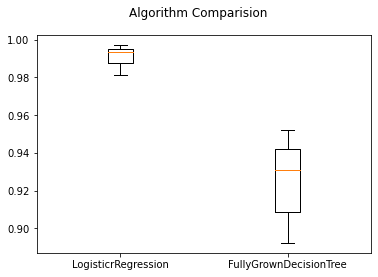

In [21]:
#Evaluating each odel in turn
results = []
names   = []
for name , model in models:
    kfold      = model_selection.KFold(shuffle = True ,  n_splits = 5 , random_state = 0)
    cv_results = model_selection.cross_val_score(model, x , y ,cv = kfold , scoring = "roc_auc")
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_results) , np.var(cv_results,ddof = 1)))
    # boxplot algorithm comparision
fig  = plt.figure()
fig.suptitle("Algorithm Comparision")
ax   = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [22]:
# Logistic Regression
# Bias Error = Avg = 0.99         Variance = 0.000042

# FullyGrownDecisionTree
# Bias = 0.925109                 Variance = 0.000594     

In [23]:
# KFolds
# Total data has 563 rows
# no of folds = total no of rows / 5  ==> 563 /5 ==> 113 records per fold
# 4 folds are Xtrain
# 1 fold is Xtest


In [24]:
#
# cross_val_score performs 3 operations(suppose first model is lR)
# 1) LR.fit(Xtrain , Ytrain) will happen. KFold Will supply those Xtrain and Ytrain
# 2) y_pred = LR.predict(Xtest), xtest is passed , result stored in y_pred, y_pred and y_test is
#
#    compared 
# 3) It will check the scoring , by deafult scoring is overall acuracy , in above code roc_auc
#    is calculated , for which we require TPR(Y-axis) AND FPR(X-axis)

#  Assume AUC scores 
#  Fold1 = 78%
#  Fold2 = 82%
#  Fold3 = 
#  Fold4
#  Fold5

# At end cv_results will have 5 scores

# print statement in above code 
# Bias error     = np.mean(cv-results)
# Variance Error = np.var(cv_results,ddof = 1)

In [25]:
# Boxplot insights
# As Box is elongated it implies higher variance
# Assume distribution is normal , Q2 acts like mean ,Means of both the models are significantly  
# Different

In [26]:
results

[array([0.99364878, 0.99501425, 0.98108108, 0.98785166, 0.99700997]),
 array([0.93077167, 0.95192308, 0.89222973, 0.94181586, 0.90880399])]

In [27]:
# Row 1 is for Logistic 
print("Logistic:     Avg:",np.mean(results[0]), "Variance: " , np.var(results[0],ddof = 1))
# Row 2 is fro DecisionTree
print("DecisionTree: Avg:",np.mean(results[1]), "Variance: " , np.var(results[1],ddof = 1))

Logistic:     Avg: 0.9909211465332948 Variance:  4.1878944537923184e-05
DecisionTree: Avg: 0.9251088647376843 Variance:  0.0005942698820229264


In [28]:
# LOgistic avg is better and it is highly consistent(var)
# FullyGrownDecisionTree silghtly fluctuates , variance is slightly higher that logistic ,also avg is less

# Logistic Performs Better

In [29]:
# Refit the model for displaying the tree
DT.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Displaying the Tree

In [30]:
from IPython.display import Image
from sklearn import tree
from os import system

BC_Tree_File  = open("bc_data.dot","w")   #opening the file in write mode
dot_data      = tree.export_graphviz(DT, out_file = BC_Tree_File,
                            feature_names = list(x), class_names = ["Benign","Malignent"])
BC_Tree_File.close()

In [31]:
system("dot -Tsvg bc_data.dot -o BC_tree.svg")  # This command is to the OS
#Image("BC_tree.svg")    #error , use Webgraphviz.com for visual
# The content in bc_data.dot file and paste on above link and see the decision Tree

1

In [32]:
# To prune the decision tree we need to provide max_depth = 6
# Dont overprune it so that the model will under fit
# Generalize the decision Tree means reducing the Variance error

In [33]:
# see the feature important score
print(pd.DataFrame(DT.feature_importances_ , columns = ["Imp"] , index = x.columns))

                              Imp
radius_mean              0.000000
texture_mean             0.000000
perimeter_mean           0.000000
area_mean                0.000000
smoothness_mean          0.000000
compactness_mean         0.000000
concavity_mean           0.005082
concave points_mean      0.000000
symmetry_mean            0.007379
fractal_dimension_mean   0.000000
radius_se                0.000000
texture_se               0.000000
perimeter_se             0.000000
area_se                  0.017597
smoothness_se            0.000000
compactness_se           0.000000
concavity_se             0.000000
concave points_se        0.000000
symmetry_se              0.000000
fractal_dimension_se     0.023763
radius_worst             0.011973
texture_worst            0.076738
perimeter_worst          0.685889
area_worst               0.006659
smoothness_worst         0.057138
compactness_worst        0.000000
concavity_worst          0.000000
concave points_worst     0.077020
symmetry_worst

In [34]:
# Features with values 0 is never used
# Mostly used feature is perimeter_worst

## Regularized decision Tree

In [35]:
# Regularization of decision Tree means we do not allow entropy/gini score to reach 0
# We just stop it before it becomes 0
# We do this by technique called pruning
# From coding perspective pruning can be done by controlling hyperparameter (max_depth)

In [36]:
x = df.drop("diagnosis" , axis = 1)
y = df["diagnosis"]

In [37]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [38]:
LR     = LogisticRegression()
DT     = DecisionTreeClassifier(criterion = "entropy" , random_state = 0)
DT_reg = DecisionTreeClassifier(max_depth = 6 , criterion = "entropy" , random_state = 0)

In [39]:
models = []
models.append(("LogisticRegression",LR))
models.append(("FullyGrownDecisionTree",DT))
models.append(("Regularized/Pruned DT",DT_reg))    #Post Pruning

LogisticRegression: 0.990921 (0.000042)
FullyGrownDecisionTree: 0.925109 (0.000594)
Regularized/Pruned DT: 0.919914 (0.000423)


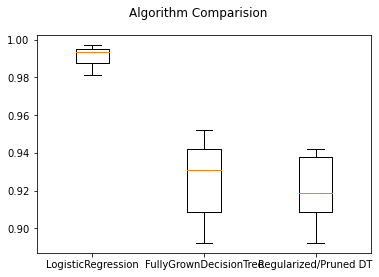

In [40]:
#Evaluating each odel in turn
results = []
names   = []
for name , model in models:
    kfold      = model_selection.KFold(shuffle = True ,  n_splits = 5 , random_state = 0)
    cv_results = model_selection.cross_val_score(model, x , y ,cv = kfold , scoring = "roc_auc")
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_results) , np.var(cv_results,ddof = 1)))
    # boxplot algorithm comparision
fig  = plt.figure()
fig.suptitle("Algorithm Comparision")
ax   = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Random Forest

In [41]:
# Random Forest is the collection of decision Tree

In [42]:
x = df.drop("diagnosis" , axis = 1)
y = df["diagnosis"]

In [43]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
LR     = LogisticRegression()
DT     = DecisionTreeClassifier(criterion = "entropy" , random_state = 0)
DT_reg = DecisionTreeClassifier(max_depth = 6 , criterion = "entropy" , random_state = 0)
RF     = RandomForestClassifier(n_estimators = 10 , random_state = 0)

In [45]:
models = []
models.append(("LogisticRegression",LR))
models.append(("FullyGrownDecisionTree",DT))
models.append(("Regularized/Pruned DT",DT_reg))    #Post Pruning
models.append(("RandomForest" ,RF ))

LogisticRegression: 0.990921 (0.000042)
FullyGrownDecisionTree: 0.925109 (0.000594)
Regularized/Pruned DT: 0.919914 (0.000423)
RandomForest: 0.988738 (0.000126)


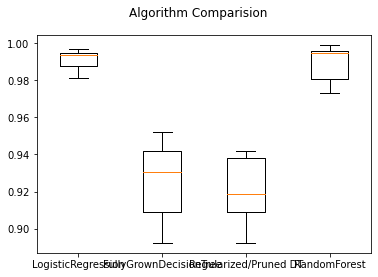

In [46]:
#Evaluating each odel in turn
results = []
names   = []
for name , model in models:
    kfold      = model_selection.KFold(shuffle = True ,  n_splits = 5 , random_state = 0)
    cv_results = model_selection.cross_val_score(model, x , y ,cv = kfold , scoring = "roc_auc")
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_results) , np.var(cv_results,ddof = 1)))
    # boxplot algorithm comparision
fig  = plt.figure()
fig.suptitle("Algorithm Comparision")
ax   = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [47]:
# Random forest performs better than the Regularized / Pruned Tree
# Random forest performance is near to Logistic regression

### Gini Score

In [48]:
x = df.drop("diagnosis" , axis = 1)
y = df["diagnosis"]

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [49]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [50]:
LR     = LogisticRegression()
DT     = DecisionTreeClassifier(criterion = "gini" , random_state = 0)

In [51]:
# define a empty list models
models = []
models.append(("LogisticrRegression",LR))
models.append(("FullyGrownDecisionTree",DT))

LogisticrRegression: 0.990921 (0.000042)
FullyGrownDecisionTree: 0.923706 (0.000607)


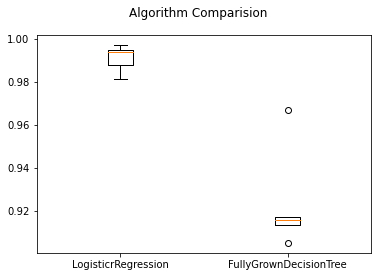

In [52]:
#Evaluating each odel in turn
# in print np.mean menas bias error , np.var means variance error
results = []
names   = []
for name , model in models:
    kfold      = model_selection.KFold(shuffle = True ,  n_splits = 5 , random_state = 0)
    cv_results = model_selection.cross_val_score(model, x , y ,cv = kfold , scoring = "roc_auc")
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_results) , np.var(cv_results,ddof = 1)))
    # boxplot algorithm comparision
fig  = plt.figure()
fig.suptitle("Algorithm Comparision")
ax   = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [53]:
# Average is almost same but there is change in variance when we use Gini
# Gini score is increasing the variance

In [54]:
# Entropy is better criteria than gini score